Key concept:

Finding approximate solutions of over-determined systems of linear equations by minimizing the sum of the squares
of the errors in the equations.

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# 12.1 Least squares problem

- Suppose m × n matrix $A$ is tall (m > n), so $Ax = b$ is over-determined. These equations have a solution only if b is a linear combination of the columns of A.
- For most choices of $b$, there is no x that satisfies $Ax = b$.
- *residual* is $r = Ax - b$ (or $r = b - Ax$)
-  least squares problem: $\underset{x}{\text{minimize}}\ \|Ax − b\|^2$, where $\|Ax − b\|^2$ is called the *objective function*
- Any n-vector $\hat{x}$ that satisfies $\|A\hat{x}−b\|^2 \le \|Ax−b\|^2$ for all $x$ is a solution of the least squares problem
- $\hat{x}$ called *least squares approximate solution* of $Ax = b$
- $\hat{x}$ need not (and usually does not) satisfy $A\hat{x} = b$, but if $\hat{x}$ does satisfy $A\hat{x} = b$, then it solves least squares problem
- also called *regression* (in data fitting context)

## Column interpretation

Suppose $a_1, \ldots, a_n$ are columns of $A$, then

$$
\|Ax − b\|^2 = \|(x_1 a_1 + \cdots + x_n a_n) − b\|^2
$$

so least squares problem is to find a **linear combination** of columns of $A$ that is closest to $b$

---
If $\hat{x}$ is a solution of least squares problem, the m-vector

$$
A\hat{x} = \hat{x}_1 a_1 + \cdots + \hat{x}_n a_n
$$

is closest to the vector $b$, among all linear combinations of columns of $A$

## Row interpretation

Suppose $\tilde{a}^T_1, \ldots, \tilde{a}^T_m$ are rows of $A$, so the residual components are given by

$$
r_i = \tilde{a}^T_i x − b_i, \ i = 1, \ldots, m
$$

The least squares objective is then

$$
\|Ax − b\|^2 = (\tilde{a}^T_1 x − b_1)^2 + \cdots + (\tilde{a}^T_m x − b_m)^2
$$

the sum of the squares of the residuals in m scalar linear equations.

so least squares minimizes sum of squares of residuals
- solving $Ax = b$ is making all residuals zero
- least squares attempts to make them all **small**

We take the small least squares problem of Figure 12.1 in VMLS and check that $\|A\hat{x}−b\|$ is less than $\|Ax − b\|$ for some other value of $x$.

In [2]:
A = np.array([[2, 0],
              [-1, 1],
              [0, 2]])
b = np.array([1, 0, -1])
x_hat = np.array([1/3, -1/3])
r_hat = A @ x_hat - b
np.linalg.norm(r_hat)

0.816496580927726

In [3]:
x = np.array([1/2, -1/2]) #other value of x
r = A @ x - b
np.linalg.norm(r)

1.0

# 12.2 Solution

<span  style="color:red; font-weight:bold">The solution to the least squares problem derived in VMLS is based on the following assumptions:</span>

Matrix $A$ has *linearly independent* columns

## Solution via calculus

We know that any minimizer $\hat{x}$ must satisfy

$$
\frac{\partial f}{\partial x_i}(\hat{x}) = 0, \ i = 1, \ldots, n
$$
which we can express as the vector equation
$$
\nabla f(\hat{x}) = 0
$$

The gradient can be expressed in matrix form as
$$
\nabla f(x) = 2A^T(Ax − b)
$$

---
**Derivation**

Define the objective function of least square problem

$$
f(x) = \|Ax − b\|^2 = \sum^m_i\Bigg(\sum^n_j{A_{ij}x_{j} − b_i}\Bigg)^2
$$

taking partial derivatives of $f$ with respect to $x_k$ (kth entry of vector $x$)

$$
\begin{align}
\nabla f(x_k)
&= \frac{\partial f} {\partial x_k} \\
&= \sum^m_i 2 \Bigg(\sum^n_j{A_{ij} x_{j} − b_i} \Bigg) A_{ik} \\
&= \sum^m_i 2 (A^T)_{ki} (Ax − b)_i \\
&= \Big(2A^T(Ax − b)\Big)_k
\end{align}
$$

This is our formula $\nabla f(x) = 2A^T(Ax − b)$, written out in terms of its components.

<br>

Any minimizer $\hat{x}$ of $\|Ax − b\|^2$ must satisfy
$$
\nabla f(\hat{x}) = 2A^T(Ax − b) = 0,
$$
which can be written as 
$$
A^T A \hat{x} = A^T b
$$
These equations are called the *normal equations*.

Assuming that the columns of A are linearly independent, it means that the Gram matrix $A^T A$ is invertible
So

$$
\hat{x} = (A^T A)^{−1}A^T b
$$

In [4]:
np.linalg.inv(A.T @ A) @ A.T @ b  # the columns of A are linearly independent

array([ 0.33333333, -0.33333333])

In [5]:
np.linalg.pinv(A) @ b

array([ 0.33333333, -0.33333333])

In [6]:
(A.T @ A) @ x_hat - A.T @ b  # Check that normal equations hold

array([-2.22044605e-16,  2.22044605e-16])

<span  style="color:red; font-weight:bold"> Check A with linearly dependent columns </span>

In [7]:
A_dependent = np.array([[2, -1],
                         [-1, 0.5],
                         [4, -2]])
# np.linalg.inv(A_dependent.T @ A_dependent) @ A_dependent.T @ b

LinAlgError: Singular matrix

In [8]:
A_dependent.T @ A_dependent  # singular matrix => non-invertible

array([[ 21.  , -10.5 ],
       [-10.5 ,   5.25]])

In [9]:
np.linalg.pinv(A_dependent)  # pseudo-inverse exist!!

array([[ 0.07619048, -0.03809524,  0.15238095],
       [-0.03809524,  0.01904762, -0.07619048]])

In [10]:
np.linalg.pinv(A) @ b  # this solution has the minimum 2-norm

array([ 0.33333333, -0.33333333])

## Direct verification of least squares solution

Let $\hat{x} = (A^TA)^{−1}A^T b$, so $A^T(A\hat{x} − b) = 0$

For any n-vector x we have
$$\begin{align}
\|Ax − b\|^2 &= \|(Ax − A\hat{x}) + (A\hat{x} − b)\|^2 \\
&= \|Ax − A\hat{x}\|^2 + \|A\hat{x} − b\|^2 + 2 (Ax − A\hat{x})^T (A\hat{x} − b) \\
&= \|Ax − A\hat{x}\|^2 + \|A\hat{x} − b\|^2 + 2 (A(x − \hat{x}))^T (A\hat{x} − b)\\
&= \|Ax − A\hat{x}\|^2 + \|A\hat{x} − b\|^2 + 2 (x − \hat{x})^T A^T (A\hat{x} − b)\\
&= \|Ax − A\hat{x}\|^2 + \|A\hat{x} − b\|^2 + 2 (x − \hat{x})^T (A^T A\hat{x} − A^T b)\\
&= \|Ax − A\hat{x}\|^2 + \|A\hat{x} − b\|^2 + 2 (x − \hat{x})^T 0\\
&= \|Ax − A\hat{x}\|^2 + \|A\hat{x} − b\|^2
\end{align}
$$

The first term on the right-hand side is nonnegative and therefore
$$
\|Ax − b\|^2 \ge \|A\hat{x} − b\|^2
$$

if equality holds, $A(x − \hat{x}) = 0$, which implies $x = \hat{x}$ since columns of A are linearly independent ($Ax=0, x = 0$)


## Row form

$$
\hat{x} = (A^T A)^{−1}A^Tb = \Bigg(\sum^m_{i=1}{\tilde{a}_i \tilde{a}^T_i}\Bigg)^{−1} \Bigg(\sum^m_{i=1}{b_i \tilde{a}_i}^{-1}\Bigg)
$$

# Orthogonality principle

for any n-vector $z$, we have

$$(Az) \perp \hat{r}, \ \hat{r} = A\hat{x} - b$$

---
Derive the orthogonality principle from the normal equations, which can be expressed as $A^T(A\hat{x} − b) = 0$.

$$
(Az)^T\hat{r} = (Az)^T(A\hat{x} − b) = z^T A^T(A\hat{x} − b) = 0
$$

In [11]:
z = np.array([-1.1, 2.3])
(A @ z).T @ r_hat

2.220446049250313e-16

In [12]:
(A @ z).T @ r

-3.4

In [13]:
z = np.array([5.3, -1.2])
(A @ z).T @ r_hat

-6.661338147750939e-16

In [14]:
(A @ z).T @ r

6.5

# 12.3 Solving least squares problems

Least squares via QR factorization

**given** an m × n matrix $A$ with *linearly independent columns* and an m-vector $b$.
1. QR factorization. Compute the QR factorization $A = QR$.
2. Compute $Q^Tb$.
3. Back substitution. Solve the triangular equation $R\hat{x} = Q^Tb$.

In [15]:
A = np.random.normal(size=(100, 20))
b = np.random.normal(size=100)

In [18]:
x1 = np.linalg.lstsq(A, b)[0] # Least squares using backslash operator
x2 = np.linalg.inv(A.T @ A) @ (A.T @ b) # Using formula
x3 = np.linalg.pinv(A) @ b # Using pseudo-inverse
Q, R = np.linalg.qr(A);
x4 = np.linalg.solve(R, Q.T @ b); # Using QR factorization

D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [22]:
print(np.linalg.norm(x1-x2))
print(np.linalg.norm(x2-x3))
print(np.linalg.norm(x3-x4))

8.053242382167588e-16
8.939483013937198e-16
8.006204592953983e-16


## Complexity

$$2mn^2 + 2mn + n^2 \approx 2mn^2$$

In [31]:
m = 2000
n = 500
A = np.random.normal(size=(m, n))
b = np.random.normal(size=m)
%timeit x = np.linalg.lstsq(A, b)

D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


65.5 ms ± 1.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
m = 4000
n = 500
A = np.random.normal(size=(m, n))
b = np.random.normal(size=m)
%timeit x = np.linalg.lstsq(A, b)

D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


98.2 ms ± 3.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
m = 2000
n = 1000
A = np.random.normal(size=(m, n))
b = np.random.normal(size=m)
%timeit x = np.linalg.lstsq(A, b)

D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


291 ms ± 9.36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


doubling m approximately doubles the computation time

doubling n increases it by around a factor of four

## Matrix least squares

In [36]:
A = np.random.normal(size=(1000, 100))
B = np.random.normal(size=(1000, 10))

X = np.linalg.lstsq(A, B)[0]

# Check that third column of X is least squares solution with third column of B
x3 = np.linalg.lstsq(A, B[:, 2])[0]
np.linalg.norm(X[:, 2] - x3)

D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


3.836642070827155e-16

# 12.4 Examples

## Advertising purchases

In [37]:
n = 3
m = 10
R = np.array([[0.97, 1.86, 0.41],
              [1.23, 2.18, 0.53],
              [0.80, 1.24, 0.62],
              [1.29, 0.98, 0.51],
              [1.10, 1.23, 0.69],
              [0.67, 0.34, 0.54],
              [0.87, 0.26, 0.62],
              [1.10, 0.16, 0.48],
              [1.92, 0.22, 0.71],
              [1.29, 0.12, 0.62]])
v_des = 1e+3 * np.ones(10)
s = np.linalg.lstsq(R, v_des)[0]
print(s)

[  62.07662454   99.98500403 1442.83746254]


D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [38]:
np.sqrt(sum((R @ s - v_des)**2)/len(v_des))

132.6381902632653

## Illumination

In [39]:
# number of lamps
n = 10
# x, y positions of lamps and height above floor
lamps = np.array([[4.1, 20.4, 4],
                  [14.1, 21.3, 3.5],
                  [22.6, 17.1, 6],
                  [5.5, 12.3, 4.0],
                  [12.2, 9.7, 4.0],
                  [15.3, 13.8, 6],
                  [21.3, 10.5, 5.5],
                  [3.9 ,3.3, 5.0],
                  [13.1, 4.3, 5.0],
                  [20.3, 4.2, 4.5]])

N = 25  # grid size
m = N * N  # number of pixels
# construct m x 2 matrix with coordinates of pixel centers
pixels = np.hstack(
    [np.outer(np.arange(0.5, N, 1), np.ones(N)).reshape(m, 1),
     np.outer(np.ones(N), np.arange(0.5, N, 1)).reshape(m, 1)]
)

In [49]:
# The m x n matrix A maps lamp powers to pixel intensities.
# A[i,j] is inversely proportional to the squared distance of
# lamp j to pixel i.
A = np.zeros((m, n))
for i in range(m):
    for j in range(n):
        A[i,j] = 1.0 / (np.linalg.norm(np.hstack([pixels[i, :], 0]) - lamps[j, :])**2)
A = (m/np.sum(A)) * A  # scale elements of A

In [50]:
# Least squares solution
x = np.linalg.lstsq(A, np.ones(m))[0]
rms_ls = (sum((A @ x - 1)**2)/m)**0.5
print(rms_ls)

0.1403904813427606


D:\Devtools\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


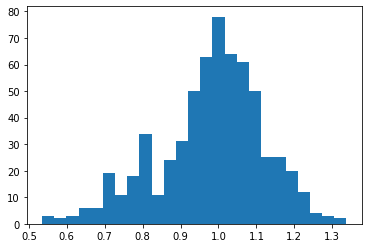

In [52]:
plt.ion()
plt.hist(A @ x, bins = 25)
plt.show()

In [53]:
# Intensity if all lamp powers are one
rms_uniform = (sum((A @ np.ones(n) - 1)**2)/m)**0.5
print(rms_uniform)

0.24174131853807873


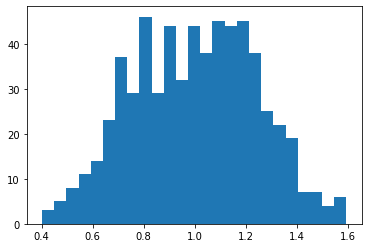

In [54]:
plt.hist(A @ np.ones(n), bins = 25)
plt.show()